# Loading, processing and visualising 3D images 
with scikit-image, numpy and matplotlib

In [6]:
from skimage.io import imread

image = imread('data/000200.raw.tif')

# print out the spatial dimensions of the image
print(image.shape)

(111, 1024, 512)


TypeError: Invalid shape (111, 1024, 512) for image data

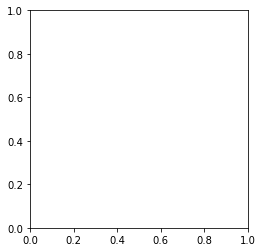

In [7]:
import matplotlib.pyplot as plt 

plt.imshow(image)
plt.show()

Showing it slice by slice

In [ ]:
import matplotlib.pyplot as plt 

plt.imshow(image[0])
plt.show()

plt.imshow(image[25])
plt.show()

plt.imshow(image[50])
plt.show()

plt.imshow(image[100])
plt.show()


Maximum projection

In [ ]:
import numpy as np

max_z = np.max(image, axis=0)
plt.imshow(max_z)
plt.show()

max_y = np.max(image, axis=1)
plt.imshow(max_y)
plt.show()

max_x = np.max(image, axis=2)
plt.imshow(max_x)
plt.show()

In [2]:
voxel_size_x = 0.52
voxel_size_y = 0.52
voxel_size_z = 2

aspect_xz = voxel_size_z / voxel_size_x
aspect_yz = voxel_size_z / voxel_size_y

def showXYZprojection(image):
    max_z = np.max(image, axis=0)
    plt.imshow(max_z)
    plt.show()

    max_y = np.max(image, axis=1)
    plt.imshow(max_y, aspect=aspect_xz)
    plt.show()

    max_x = np.max(image, axis=2)
    plt.imshow(max_x, aspect=aspect_yz)
    plt.show()

showXYZprojection(image)

NameError: name 'np' is not defined

# Visualisation with itkWidgets

In [3]:
from itkwidgets import view

view(image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [4]:
import itk

# convert our image into a proper itk_image
itk_image = itk.image_view_from_array(image)
itk_image.SetSpacing([voxel_size_x, voxel_size_y, voxel_size_z])

view(itk_image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

## Background subtraction

In [ ]:
from skimage import morphology

structuring_element = np.ones((5,5,5))

background_subtracted_image = morphology.white_tophat(image, structuring_element)

showXYZprojection(background_subtracted_image)

# Napari
Launching a Napari viewer

In [ ]:
import napari

# initialize napari 
# graphical user interface (GUI)
napari.gui_qt()

In [ ]:
%gui qt

In [ ]:
# Create an empty viewer
viewer = napari.Viewer()

In [ ]:
# Add a new layer containing an image
viewer.add_image(image);

In [ ]:
# Remove all layers to start from scratch
for l in viewer.layers:
    viewer.layers.remove(l)

In [ ]:
# add the image again with scaling
viewer.add_image(image, scale=(aspect_xz, 1, 1))

In [ ]:
# Add a new layer containing an image
viewer.add_image(background_subtracted_image, scale=(aspect_xz, 1, 1))

In [ ]:
from skimage.filters import gaussian
blurred_image = gaussian(background_subtracted_image, sigma=1)

# Add to napari
viewer.add_image(blurred_image, scale=(aspect_xz, 1, 1))

In [ ]:
from skimage import feature

peak_local_max = feature.peak_local_max(
    blurred_image,
    footprint=np.ones((7, 7, 3), dtype=np.bool),
    indices=False,
    threshold_rel=0.25
)
peaks = np.nonzero(peak_local_max)
print(len(peaks[0]))

Check the number of points above before proceeding. If it's too many, Napari may become irresponsive.

In [ ]:
viewer.add_points(np.array(peaks).T, name='peaks', size=10, face_color='red');